# Imports

### Library Imports and Helpers

Let's load all the packages that will be needed for Data preprocessing and visulaization.


In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

### CSV-File Import


#### It is time to load the file that contains the details of all flights. Due to huge amount of data and lack of memory in my PC, I merged data from 2010 to 2012 in a file called 'last_3years.csv' and I load this file as an example. Loading of all data would be similar with similar analysis as far as enough CPU and memory capacity exists
I also load airlines and airports from 'airlines.csv' and 'airports.csv'

In [2]:
df = pd.read_csv('last_3years.csv')
df_airlines = pd.read_csv('airlines.csv')
df_airports = pd.read_csv('airports.csv')

In [3]:
airlines = df_airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
airports = df_airports.set_index('IATA_CODE')['AIRPORT'].to_dict()

In [4]:
df['AIRLINE'] = df['UNIQUE_CARRIER'].replace(airlines)
#df['AIRPORT_ORIGIN'] = df['ORIGIN'].replace(airports)
#df['AIRPORT_DEST'] = df['DEST'].replace(airports)

# Data Analysis and Preprocessing

In [5]:
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (18632160, 46)


### Analyzing Datatypes and general information

A random 0.01% sample of the DataFrame with replacement is prepared in the following:

In [6]:
df = df.sample(frac =0.01, replace=True, random_state=1)

In [7]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 44,AIRLINE
12710949,2012,1,19,4,2012-01-19,EV,N14158,5909,11292,DEN,...,1.0,495.0,2,NaN,NaN,NaN,NaN,NaN,NaN,Atlantic Southeast Airlines
6762380,2011,1,27,4,2011-01-27,UA,N419UA,450,11292,DEN,...,1.0,680.0,3,NaN,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.
12325960,2011,12,28,3,2011-12-28,OO,N270YV,5546,14771,SFO,...,1.0,86.0,1,NaN,NaN,NaN,NaN,NaN,NaN,Skywest Airlines Inc.
491263,2010,1,13,3,2010-01-13,XE,N21537,2941,10257,ALB,...,1.0,143.0,1,NaN,NaN,NaN,NaN,NaN,NaN,ExpressJet
13419401,2012,2,11,6,2012-02-11,WN,N604SW,272,14679,SAN,...,1.0,258.0,2,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.


In [8]:
print('Dataframe dimensions:', df.shape)

Dataframe dimensions: (186322, 46)


A general information about dataframe df can be obtained using describe() method.

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,186322.0,2010.982074,0.819037,2010.0,2010.0,2011.0,2012.0,2012.0
MONTH,186322.0,6.526744,3.401833,1.0,4.0,7.0,9.0,12.0
DAY_OF_MONTH,186322.0,15.712879,8.797985,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,186322.0,3.931688,1.991699,1.0,2.0,4.0,6.0,7.0
FL_NUM,186322.0,2324.951938,1977.030074,1.0,688.0,1692.0,3749.0,8994.0
ORIGIN_AIRPORT_ID,186322.0,12668.869328,1525.955156,10135.0,11292.0,12889.0,13930.0,16218.0
DEST_AIRPORT_ID,186322.0,12665.016890,1523.155078,10135.0,11292.0,12889.0,13930.0,16218.0
CRS_DEP_TIME,186322.0,1326.284309,465.855310,3.0,928.0,1321.0,1720.0,2359.0
DEP_TIME,183400.0,1332.605605,477.085024,1.0,929.0,1328.0,1728.0,2400.0
DEP_DELAY,183400.0,8.072481,33.266982,-45.0,-5.0,-1.0,6.0,1418.0


In [10]:
df.dtypes

YEAR                     int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                 object
UNIQUE_CARRIER          object
TAIL_NUM                object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
ORIGIN_STATE_ABR        object
DEST_AIRPORT_ID          int64
DEST                    object
DEST_STATE_ABR          object
CRS_DEP_TIME           float64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME           float64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED

I look at 'cacelation_code' to get some insights on it. I see that there are 4 types of cancalation reason. I convert them from category into digits from 1 to 4 and assign cancelation without reason into 0.

In [11]:
df['CANCELLATION_CODE'].value_counts()

B    1407
A    1177
C     455
Name: CANCELLATION_CODE, dtype: int64

In [12]:
df.loc[df['CANCELLATION_CODE'] == 'A', 'CANCELLATION_CODE'] = 1
df.loc[df['CANCELLATION_CODE'] == 'B', 'CANCELLATION_CODE'] = 2
df.loc[df['CANCELLATION_CODE'] == 'C', 'CANCELLATION_CODE'] = 3
df.loc[df['CANCELLATION_CODE'] == 'D', 'CANCELLATION_CODE'] = 4
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].fillna(0)

In [13]:
df['CANCELLATION_CODE'].value_counts()

0    183283
2      1407
1      1177
3       455
Name: CANCELLATION_CODE, dtype: int64

# Feature and Label Selection

### Not needed features

I see some infos that do not give any useful information for our goal. I drop them from dataframe

In [14]:
remove_columns_notneeded = ['TAIL_NUM', 'FL_NUM', 'UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DISTANCE_GROUP', 'CANCELLED', 'FLIGHTS', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR']

In [15]:
df.drop(columns=remove_columns_notneeded, inplace=True)

### Handling the Null Values

There are huge numbers of null values (NaN) in the dataframe. lets analyse them.

In [16]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['missing percenpage (%)']=(missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('missing percenpage (%)').reset_index(drop = True)

,variable,missing values,missing percenpage (%)
0,YEAR,0,0.000000
1,DISTANCE,0,0.000000
2,CRS_ELAPSED_TIME,0,0.000000
3,DIVERTED,0,0.000000
4,CANCELLATION_CODE,0,0.000000
5,CRS_DEP_TIME,0,0.000000
6,CRS_ARR_TIME,0,0.000000
7,ORIGIN,0,0.000000
8,MONTH,0,0.000000
9,DAY_OF_MONTH,0,0.000000


Here I remove columns that have more than 80% NaN values. The other option is that to make another dataframe including 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', and 'LATE_AIRCRAFT_DELAY' and make a analyse based on all delay reasons which causes departure and arrival delays. 

In [17]:
remove = missing_df[missing_df[missing_df.columns[len(missing_df.columns)-1]] > 80]
remove_columns = remove.variable
df.drop(columns=remove_columns, inplace=True)

I get rid of rows with atleast one NaN value.

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

YEAR                   0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
FL_DATE                0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
DEP_DELAY_NEW          0
DEP_DEL15              0
DEP_DELAY_GROUP        0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
ARR_DELAY_NEW          0
ARR_DEL15              0
ARR_DELAY_GROUP        0
CANCELLATION_CODE      0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
AIRLINE                0
dtype: int64

In [20]:
df.shape

(182881, 30)

So the dimentionality of the dataframe is reduced.

### Handling correlated 

<div class="alert alert-block alert-info">
    It is clear that correlated features means that they bring similar information, so it is logical to remove one of them. Correlated features in general don't improve models. 
By removeing correlated features, we make the learning algorithm faster (course of dimentionality).</div>

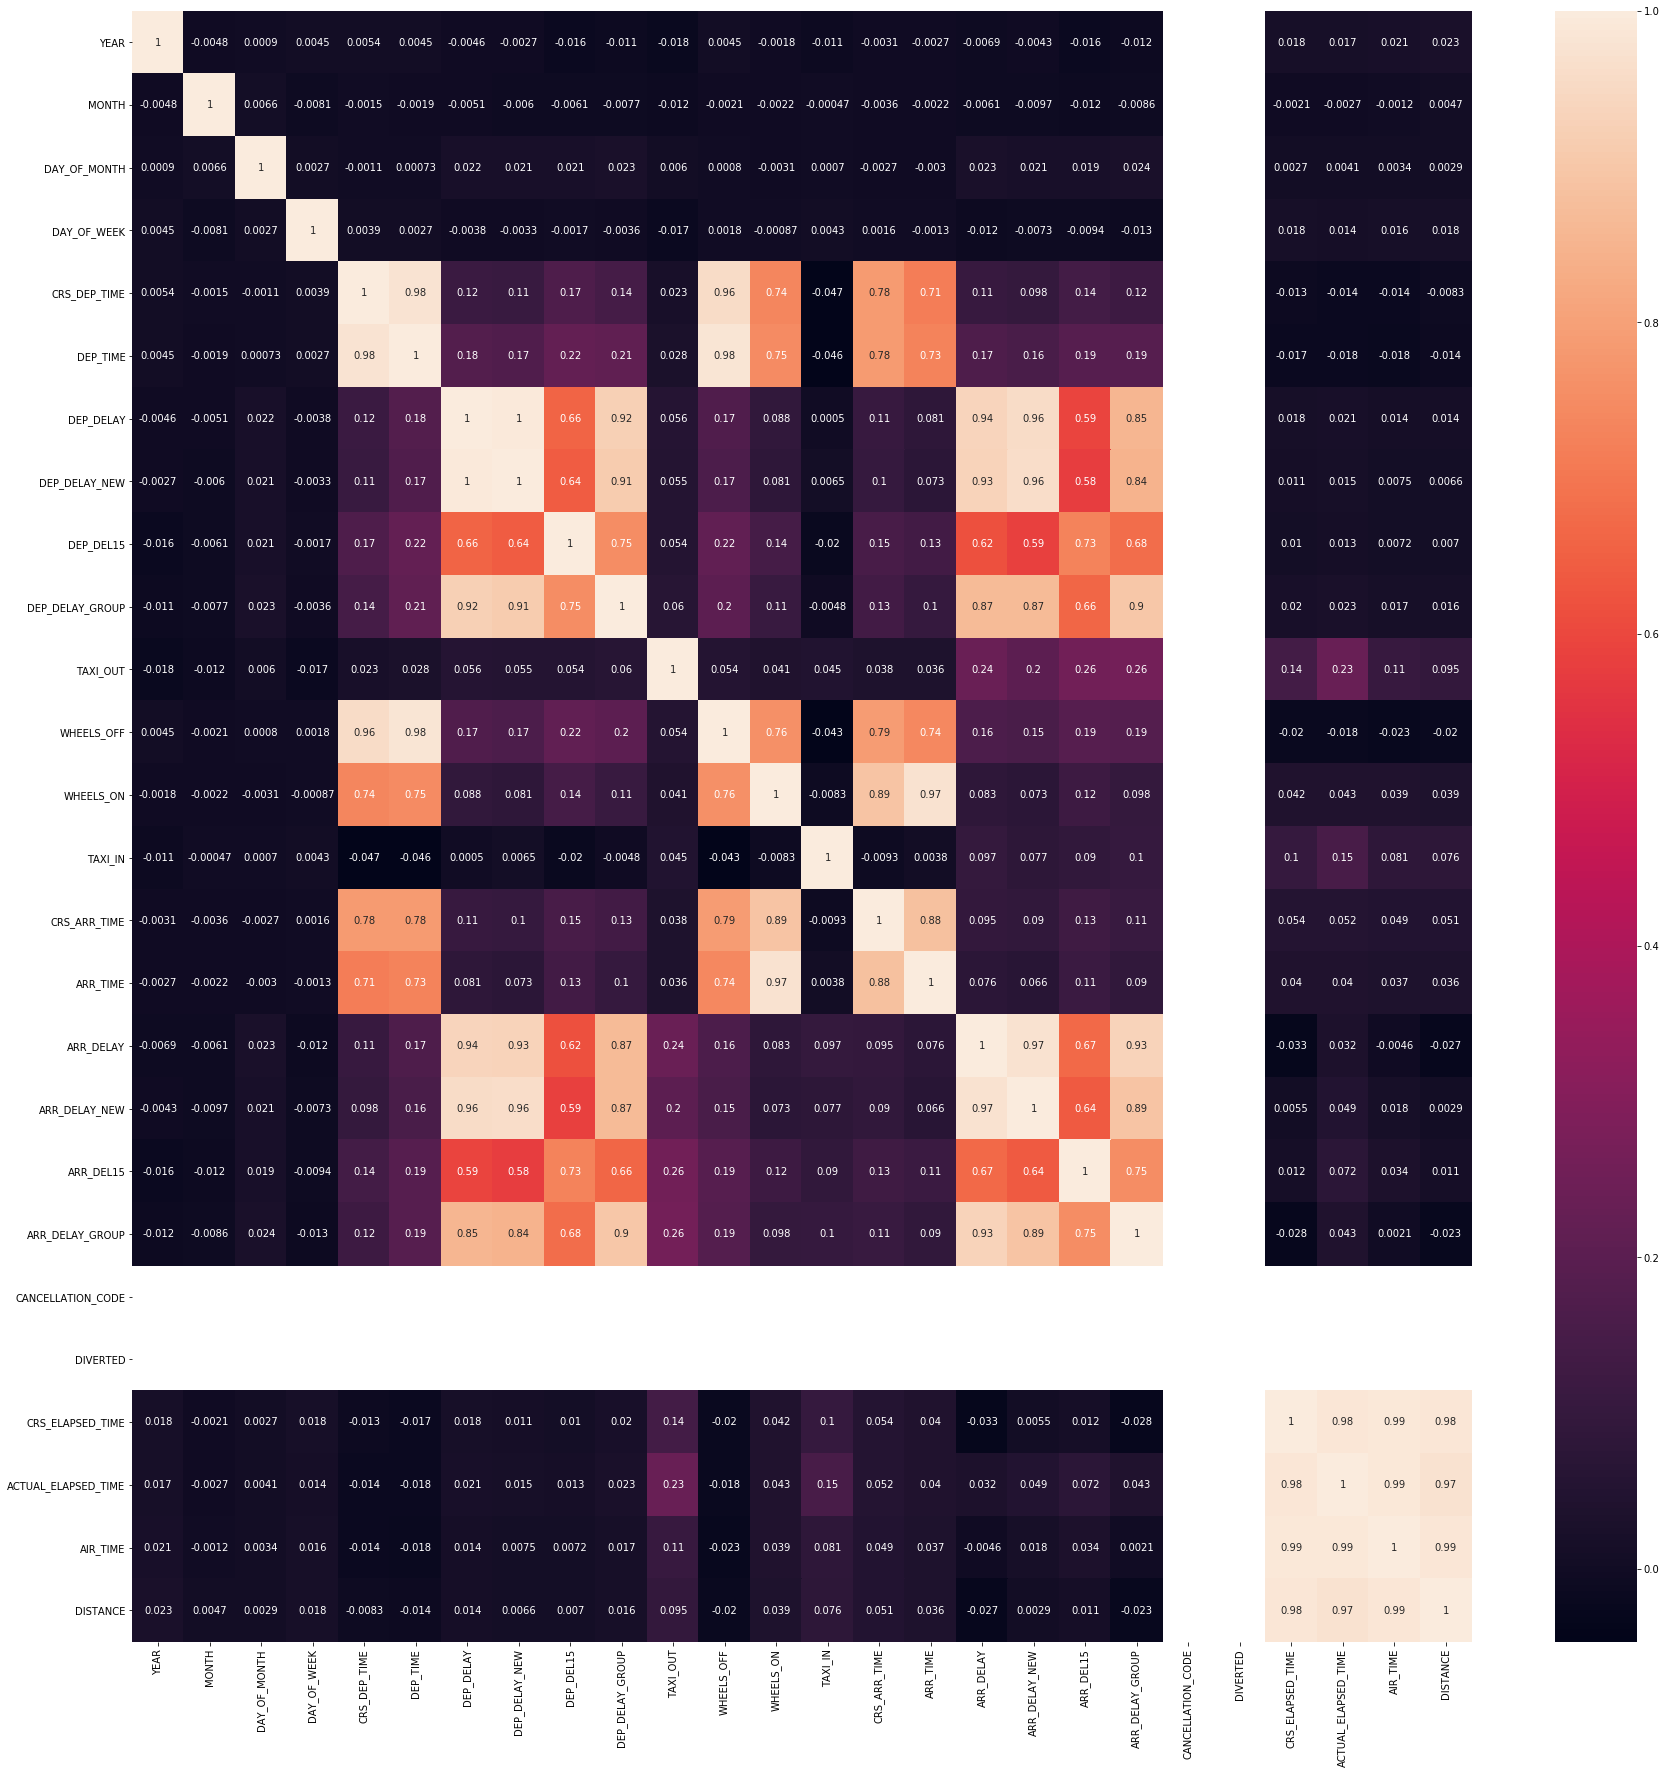

In [21]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

In [22]:
# corr_matrix = df.corr().abs()
# high_corr_var=np.where(corr_matrix>0.9)
# high_corr_var=set([corr_matrix.columns[x] for x,y in zip(*high_corr_var) if x!=y and x<y])

#### 1. An important observation is that arrival delay is highly related to dearture deay (corr = 0.94). 
#### 2. DISTANCE, AIRTIME, ACTUAL_ELAPSED_TIME and CRS_ELAPSED_TIME are highly correlated (0.97-0.99). We can keep just one of them.

In [23]:
columns = ['AIR_TIME', 'ACTUAL_ELAPSED_TIME', 'CRS_ELAPSED_TIME']

In [24]:
df.drop(df[columns], axis=1, inplace=True)

In [25]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLATION_CODE,DIVERTED,DISTANCE,AIRLINE
12710949,2012,1,19,4,2012-01-19,DEN,OKC,1014.0,1016.0,2.0,...,1246.0,1243.0,-3.0,0.0,0.0,-1.0,0,0.0,495.0,Atlantic Southeast Airlines
6762380,2011,1,27,4,2011-01-27,DEN,MSP,1553.0,1548.0,-5.0,...,1850.0,1848.0,-2.0,0.0,0.0,-1.0,0,0.0,680.0,United Air Lines Inc.
12325960,2011,12,28,3,2011-12-28,SFO,SMF,1323.0,1335.0,12.0,...,1409.0,1415.0,6.0,6.0,0.0,0.0,0,0.0,86.0,Skywest Airlines Inc.
491263,2010,1,13,3,2010-01-13,ALB,EWR,910.0,904.0,-6.0,...,1015.0,958.0,-17.0,0.0,0.0,-2.0,0,0.0,143.0,ExpressJet
13419401,2012,2,11,6,2012-02-11,SAN,LAS,1030.0,1029.0,-1.0,...,1145.0,1157.0,12.0,12.0,0.0,0.0,0,0.0,258.0,Southwest Airlines Co.


In [26]:
df.shape

(182881, 27)

# Exploratory analysis

## Statistical parameters from a grouby object

Some statistics about departure and arrival delays of airlines.

In [27]:
def statistics(group):
    return {'min': group.min(), 'max': group.max(),'count': group.count(), 'mean': group.mean()}

dep_statistics = df['DEP_DELAY'].groupby(df['AIRLINE']).apply(statistics).unstack().sort_values('count')
arr_statistics = df['ARR_DELAY'].groupby(df['AIRLINE']).apply(statistics).unstack().sort_values('count')
pd.concat([dep_statistics, arr_statistics], axis=1, sort=False)

,min,max,count,mean,min,max,count,mean
AIRLINE,,,,,,,,
Virgin America,-12.0,384.0,505.0,9.213861,-45.0,376.0,505.0,4.324752
PSA Airlines,-15.0,260.0,1452.0,8.588154,-54.0,292.0,1452.0,6.451791
Hawaiian Airlines Inc.,-17.0,892.0,2144.0,-0.939366,-47.0,898.0,2144.0,-0.095149
Frontier Airlines Inc.,-44.0,620.0,2440.0,7.589754,-46.0,621.0,2440.0,6.239344
Endeavor Air,-28.0,317.0,2549.0,7.134955,-53.0,367.0,2549.0,3.844645
Alaska Airlines Inc.,-39.0,420.0,4260.0,1.111502,-56.0,417.0,4260.0,-2.300235
Mesa Airlines Inc.,-22.0,316.0,4555.0,4.535675,-47.0,318.0,4555.0,2.702086
Continental Airlines,-17.0,823.0,4696.0,8.666099,-65.0,844.0,4696.0,4.751065
JetBlue Airways,-25.0,464.0,6415.0,10.695401,-62.0,428.0,6415.0,6.497584


## Delay category analysis

I divide delays into three categories: *no delay*  if delay is less than 5 minutes, *small delay* if the delay is between 5 and 30 minutes and *large delay* when it is more than 30 minutes.

In [28]:
delay_type = lambda x:(('No delay','Small delay')[x > 5],'Large delay')[x > 30]

In [29]:
months = ['January','February','Mach','April','May','June','July', 'August', 'September', 'October', 'November', 'December'] 
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
timespan =['Night', 'Morning', 'Afternoon', 'Evening']

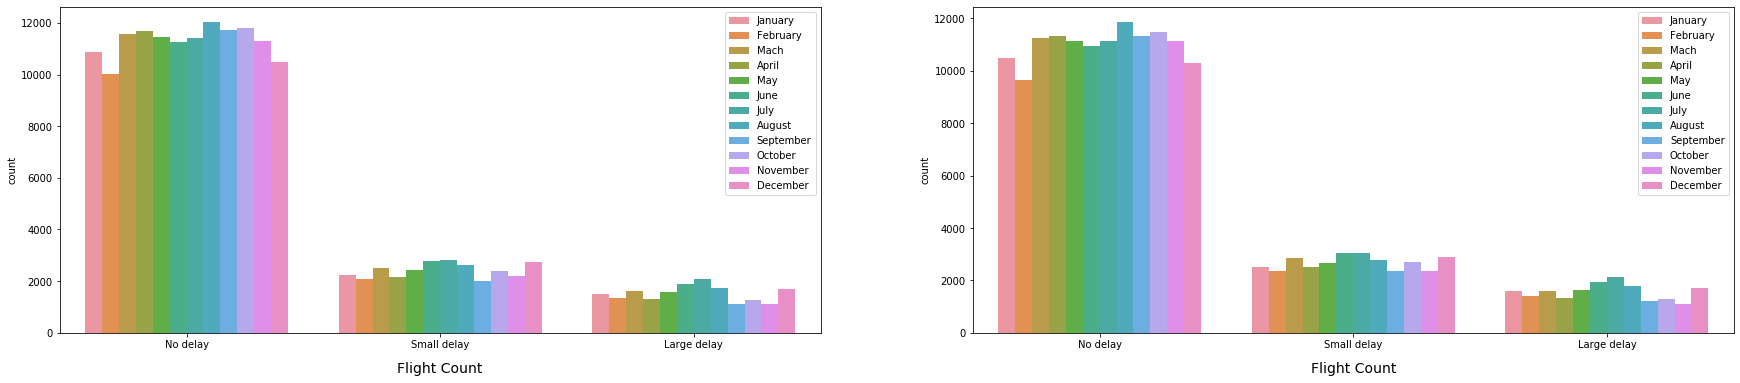

In [30]:
fig = plt.figure(figsize=(30,6))
ax1=plt.subplot(121)
sns.countplot(x =df['DEP_DELAY'].apply(delay_type) , hue = df['MONTH'], data = df)
plt.xlabel('Departure Delay', fontsize=14, labelpad=12)
plt.xlabel('Flight Count', fontsize=14, labelpad=12)
ax1.legend(months)
ax2=plt.subplot(122)
sns.countplot(x =df['ARR_DELAY'].apply(delay_type) , hue = df['MONTH'], data = df)
plt.xlabel('Arrival Delay', fontsize=14, labelpad=12)
plt.xlabel('Flight Count', fontsize=14, labelpad=12)
ax2.legend(months)
plt.show()

### Some observations:
### Question: Is there any relationship between the month and delays?
#### Answer: Based on observation of the above plots, during the summertime (June, July and August) and December, small and large delays in departures and arrivals increase slightly

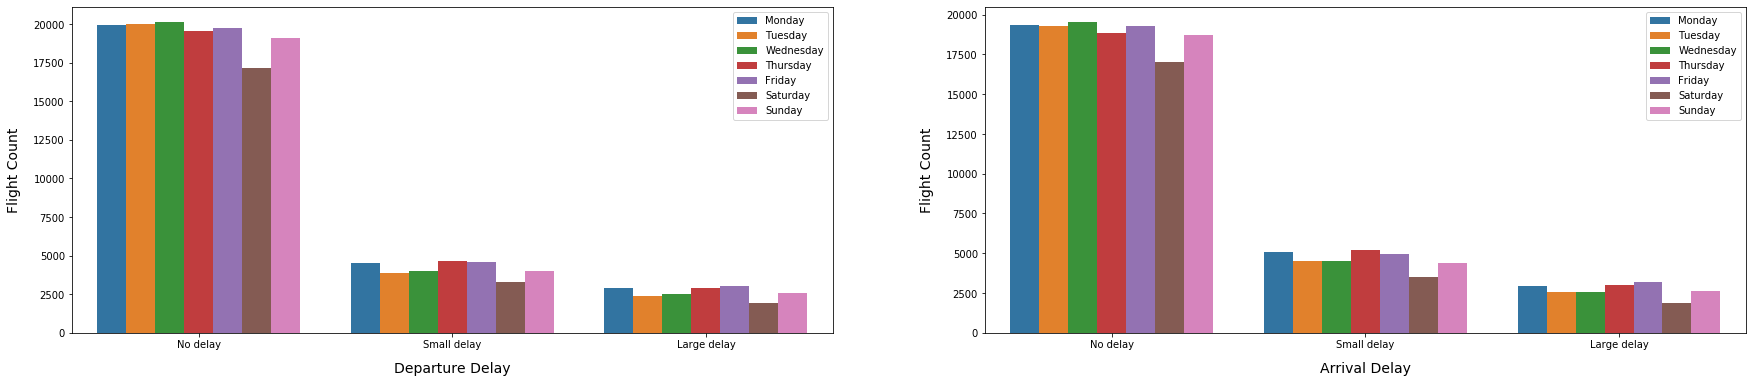

In [31]:
fig = plt.figure(figsize=(30,6))
ax1=plt.subplot(121)
sns.countplot(x = df['DEP_DELAY'].apply(delay_type), hue = 'DAY_OF_WEEK', data = df)
plt.xlabel('Departure Delay', fontsize=14, labelpad=12)
plt.ylabel('Flight Count', fontsize=14, labelpad=12)
ax1.legend(days)
ax2=plt.subplot(122)
sns.countplot(x = df['ARR_DELAY'].apply(delay_type), hue = 'DAY_OF_WEEK', data = df)
plt.xlabel('Arrival Delay', fontsize=14, labelpad=12)
plt.ylabel('Flight Count', fontsize=14, labelpad=12)
ax2.legend(days)

### Some observations:
#### Question: Is there any relationship between days of the week and delays?
#### Answer: What we can see from the plots is that departure and arrival delays are almost similar during days of the week. 

In [32]:
daytime = lambda x:((('Night','Morning')[x > 600],'Afternoon')[x > 1200],'Evening')[x > 1800]

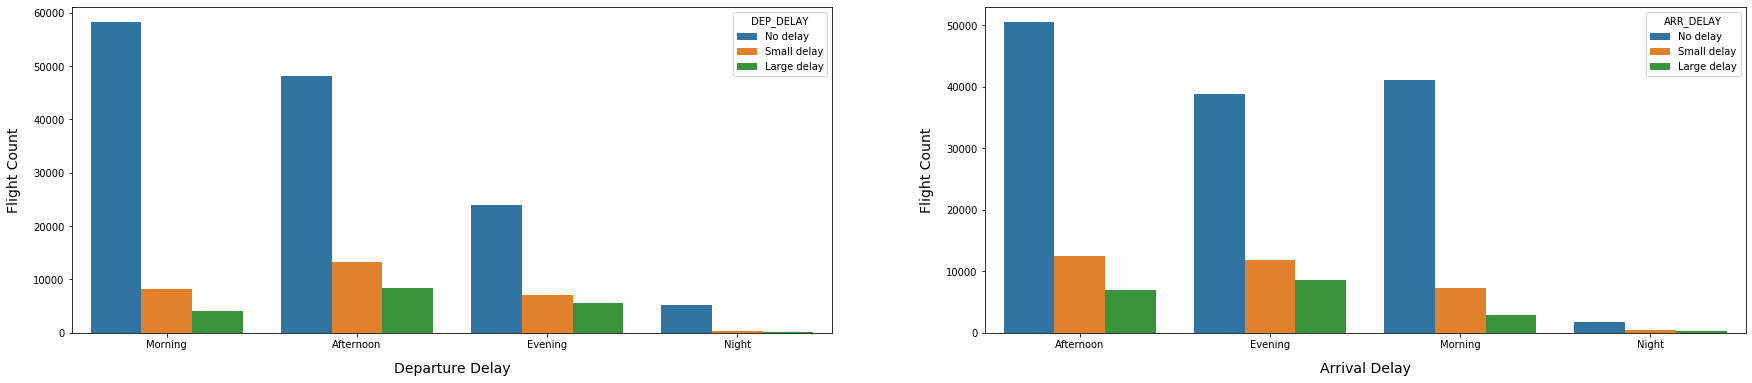

In [33]:
fig = plt.figure(figsize=(30,6))
ax1=plt.subplot(121)
sns.countplot(x = df['CRS_DEP_TIME'].apply(daytime), hue = df['DEP_DELAY'].apply(delay_type), data = df)
plt.xlabel('Departure Delay', fontsize=14, labelpad=12)
plt.ylabel('Flight Count', fontsize=14, labelpad=12)
#ax1.legend(timespan)
ax2=plt.subplot(122)
sns.countplot(x = df['CRS_ARR_TIME'].apply(daytime), hue = df['ARR_DELAY'].apply(delay_type), data = df)
plt.xlabel('Arrival Delay', fontsize=14, labelpad=12)
plt.ylabel('Flight Count', fontsize=14, labelpad=12)
#ax2.legend(timespan)
plt.show()

### Some observations:
#### 1. The above plots show that less flights happen during the midnight and flights at morning are more than afternoon and evening.
#### 2. Any kind of delay in mid-night flights are quite low.

Text(0.5, 1.0, 'Mean delay at destination')

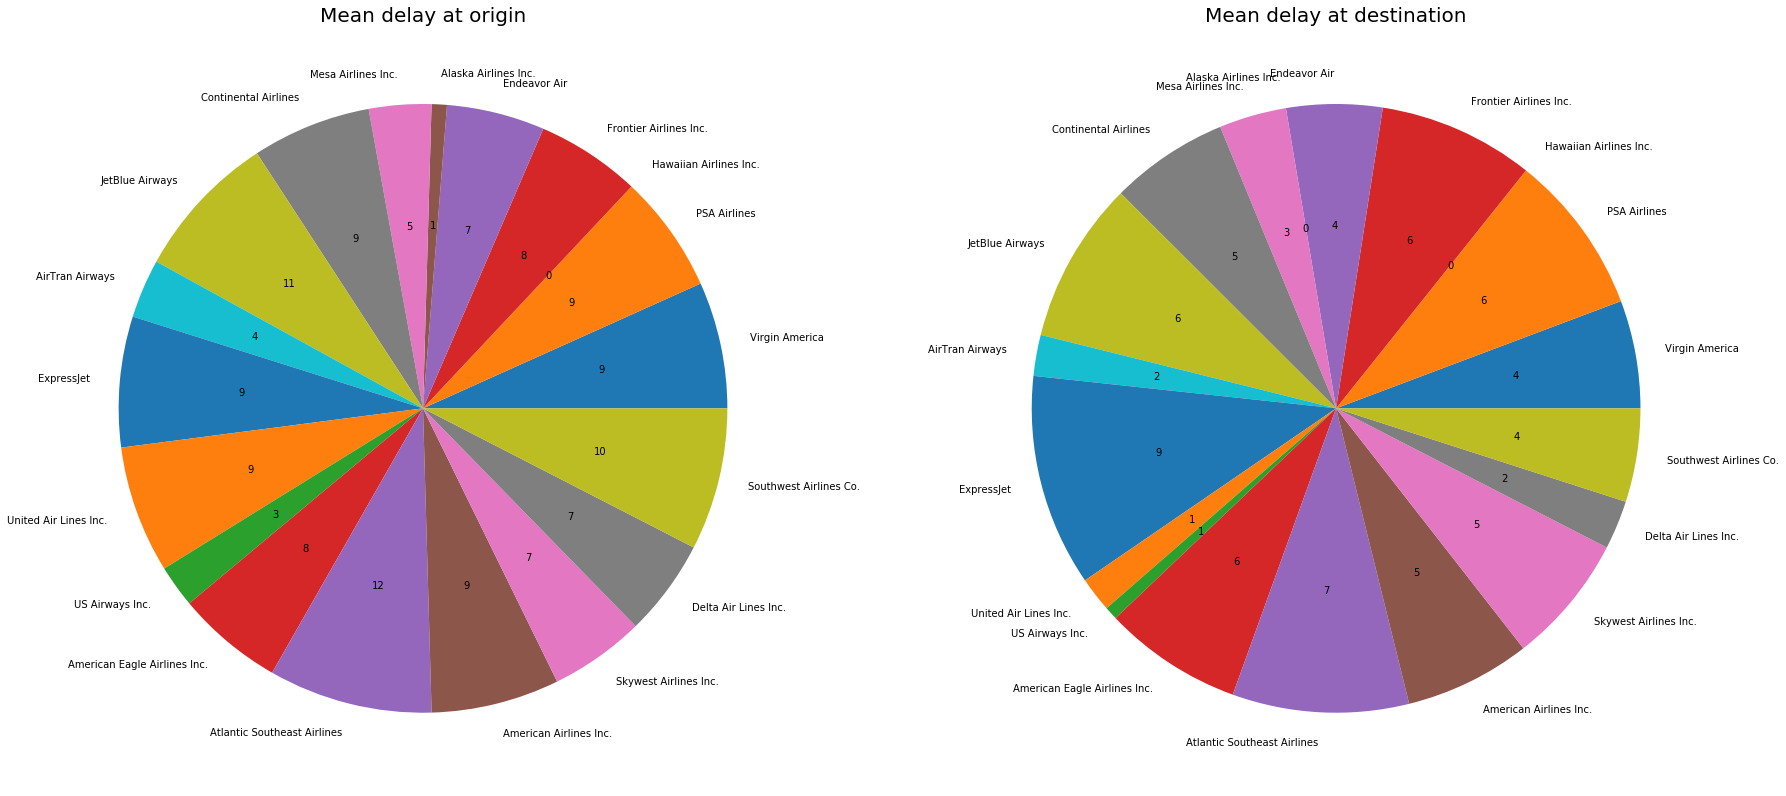

In [34]:
plt.figure(figsize=(30,30))
ax1=plt.subplot(121)
labels = [s for s in  dep_statistics.index]
sizes  = dep_statistics['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(dep_statistics))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(dep_statistics)): 
    texts[i].set_fontsize(10)
ax1.set_title('Mean delay at origin', fontsize=20)
    
ax2=plt.subplot(122)
labels = [s for s in  arr_statistics.index]
sizes  = arr_statistics['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(arr_statistics))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(arr_statistics)): 
    texts[i].set_fontsize(10)
ax2.set_title('Mean delay at destination', fontsize=20)


#### The main observation from above plots is that departure delay for all airlines are higher than their arrival delay. That shows that pilots normally speedup the airplane to conpensate the departutre delays and arrive ontime at destination.

In [35]:
df['DEP_DELAY_LEVEL'] = df['DEP_DELAY'].apply(delay_type)
df['ARR_DELAY_LEVEL'] = df['ARR_DELAY'].apply(delay_type)

In [36]:
dep_delay_airline = round(df.groupby(["DEP_DELAY_LEVEL", "AIRLINE"]).size()/df.groupby(["AIRLINE"]).size()*100,2)
arr_delay_airline = round(df.groupby(["ARR_DELAY_LEVEL", "AIRLINE"]).size()/df.groupby(["AIRLINE"]).size()*100,2)

In [37]:
df_delay_airline = pd.concat([dep_delay_airline, arr_delay_airline], axis=1, sort=False)
df_delay_airline.rename(columns={0: 'Departure delay', 1: 'Arrival delay'},  inplace = True)

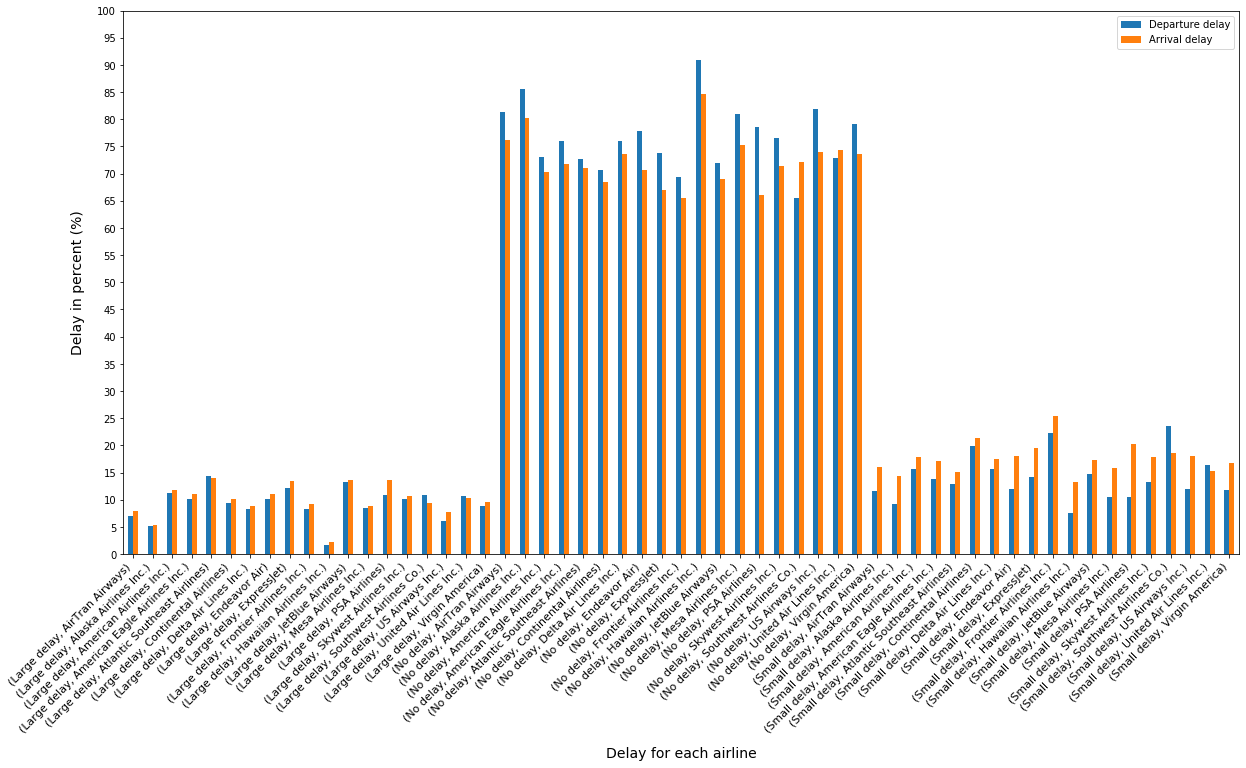

In [38]:
ax = df_delay_airline.plot(kind='bar',  figsize = (20,10))
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 45)
plt.xlabel('Delay for each airline', fontsize=14, labelpad=12)
plt.ylabel('Delay in percent (%)', fontsize=14, labelpad=12)
plt.yticks(np.arange(0, 101, step=5))
ax.legend().set_visible(True)

#### The above graph shows that in all kind of delays, departure delays are higher than arrival delays in almost all airlines.


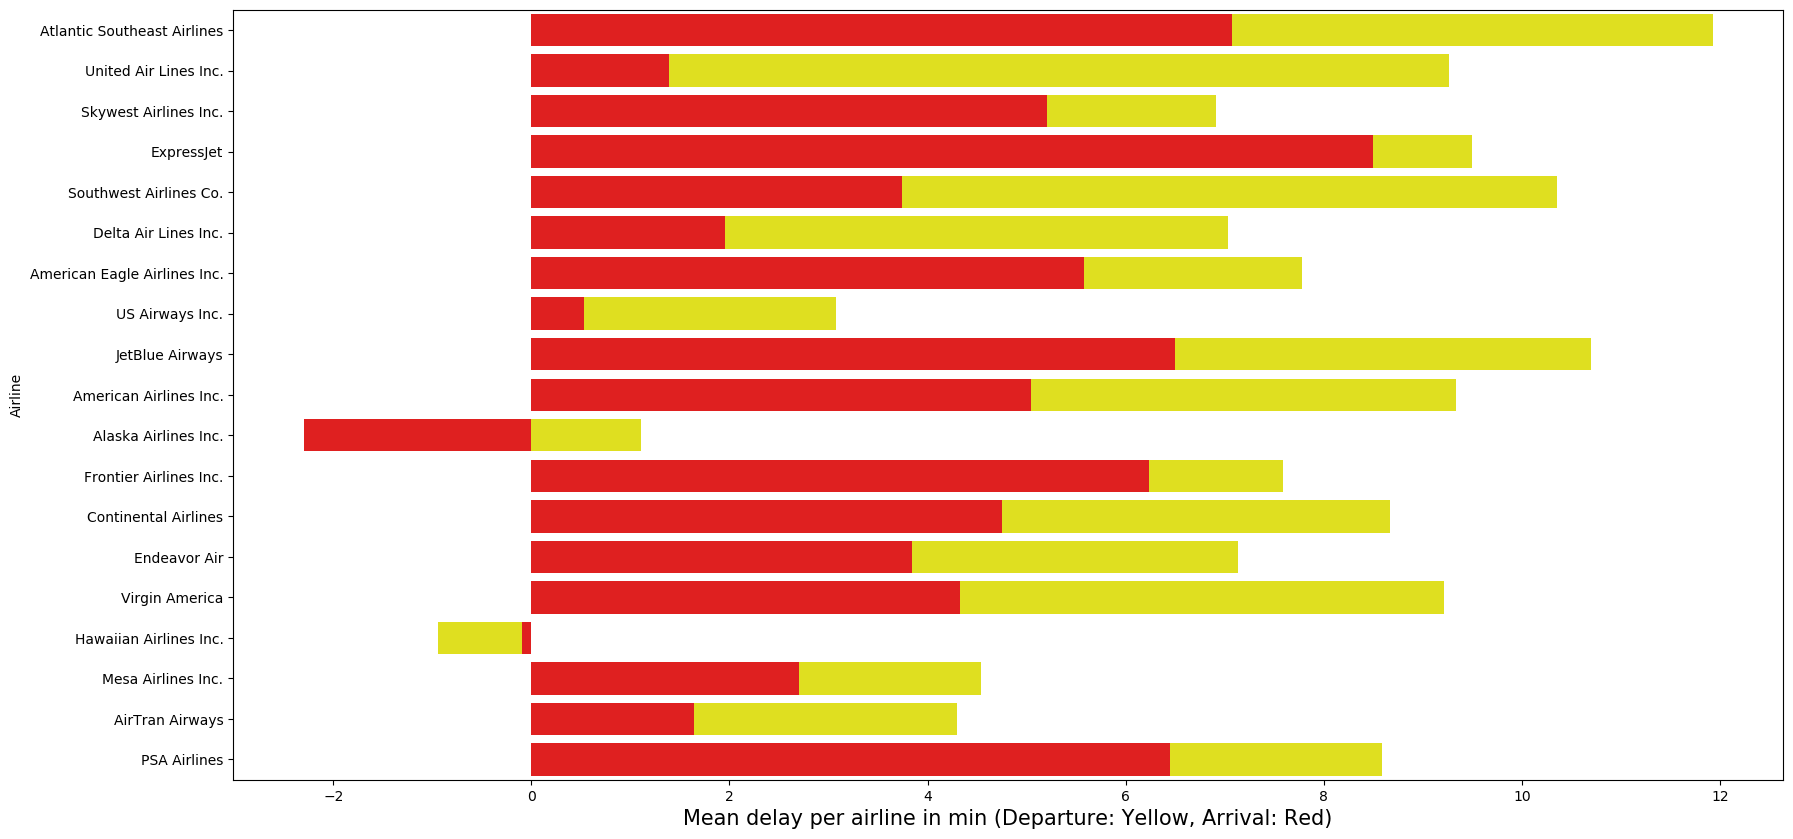

In [39]:
mpl.rcParams.update(mpl.rcParamsDefault) 
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x="DEP_DELAY", y="AIRLINE", data=df, color="yellow", ci=None)
ax = sns.barplot(x="ARR_DELAY", y="AIRLINE", data=df, color="red", ci=None)
ax.yaxis.label.set_visible(True)
plt.xlabel('Mean delay per airline in min (Departure: Yellow, Arrival: Red)', fontsize=15);
plt.ylabel('Airline')
plt.show()

#### 1. Hawaiian Airlines with no departure and arrival delays in average would be the best airline in the sense of delays.
#### 2. Expressjet has highest arrival delay (but less than its departure delay) and Atlantic Southeast Arilines has the highest departure delay.
#### 3. Alaska Airlines and Hawaiian Airlines have no arrival delays in average.

## Dummy variables

I transform categorical features into integers.

In [40]:
from sklearn import preprocessing

In [41]:
le = preprocessing.LabelEncoder()
df['AIRLINE']= le.fit_transform(df['AIRLINE'])
df['ORIGIN'] = le.fit_transform(df['ORIGIN'])
df['DEST'] = le.fit_transform(df['DEST'])

More drops!!

In [42]:
df.drop(['FL_DATE','DEP_DELAY_LEVEL', 'ARR_DELAY_LEVEL'], axis = 1, inplace = True)

In [43]:
df.shape

(182881, 26)

# Data Modeling and Prediction

### Machine learning imports

In [44]:
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor

We need to split train and test sets in a random way.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop(['DEP_DELAY', 'ARR_DELAY'], axis = 1)
y_departure = df['DEP_DELAY']
y_arrival= df['ARR_DELAY']

In [47]:
X.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,...,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,CANCELLATION_CODE,DIVERTED,DISTANCE,AIRLINE
12710949,2012,1,19,4,86,225,1014.0,1016.0,2.0,0.0,...,4.0,1246.0,1243.0,0.0,0.0,-1.0,0,0.0,495.0,4
6762380,2011,1,27,4,86,216,1553.0,1548.0,0.0,0.0,...,5.0,1850.0,1848.0,0.0,0.0,-1.0,0,0.0,680.0,17
12325960,2011,12,28,3,277,286,1323.0,1335.0,12.0,0.0,...,4.0,1409.0,1415.0,6.0,0.0,0.0,0,0.0,86.0,14
491263,2010,1,13,3,14,107,910.0,904.0,0.0,0.0,...,9.0,1015.0,958.0,0.0,0.0,-2.0,0,0.0,143.0,8
13419401,2012,2,11,6,267,171,1030.0,1029.0,0.0,0.0,...,31.0,1145.0,1157.0,12.0,0.0,0.0,0,0.0,258.0,15


## Train data and predict for departure delays

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y_departure, test_size=0.20, random_state=30)

I do some standard scaling to standardize the data (mean = 0 and variance = 1)

In [49]:
sc=preprocessing.StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

This is a continous problem and go first for linear regression. if it did not fit with the data, we check non-linear models.

In [50]:
lasso = Lasso()
linear = LinearRegression()
ridge = Ridge()
boost_linear = AdaBoostRegressor(base_estimator=linear,random_state=2)
boost_lasso = AdaBoostRegressor(base_estimator=lasso,random_state=2)
boost_ridge = AdaBoostRegressor(base_estimator=ridge,random_state=2)
bag_linear = BaggingRegressor(base_estimator=linear,random_state=2)
bag_lasso = BaggingRegressor(base_estimator=lasso,random_state=2)
bag_ridge = BaggingRegressor(base_estimator=ridge,random_state=2)

In [51]:
accuracy = []
for model, name in zip([lasso,linear,ridge, boost_lasso, boost_linear, boost_ridge, bag_lasso, bag_linear, bag_ridge], 
                       ['Lasso','Linear','Ridge', 'Boost Lasso', 'Boost Linear', 'Boost Ridge', 'Bag Lasso', 'Bag Linear', 'Bag Ridge']):
    model_departure = model.fit(X_train_sc,y_train)
    y_predict=model_departure.predict(X_test_sc)
    accuracy.append(metrics.r2_score(y_test, y_predict))

Accuracy of different models are listed in the following dataframe.

In [53]:
models = pd.DataFrame({
    'Model': ['Lasso','Linear','Ridge', 'Boost Lasso', 'Boost Linear', 'Boost Ridge', 'Bag Lasso', 'Bag Linear', 'Bag Ridge'],
    'R2-Score': [i for i in accuracy]})
models.sort_values(by='R2-Score', ascending=False, ignore_index=True)

,Model,R2-Score
0,Bag Ridge,0.993143
1,Bag Linear,0.993143
2,Ridge,0.993138
3,Linear,0.993138
4,Boost Ridge,0.992388
5,Boost Linear,0.992385
6,Lasso,0.992154
7,Bag Lasso,0.992148
8,Boost Lasso,0.991529


I plot the last model as an example to see how the model looks like.

Text(0, 0.5, 'Predicted value')

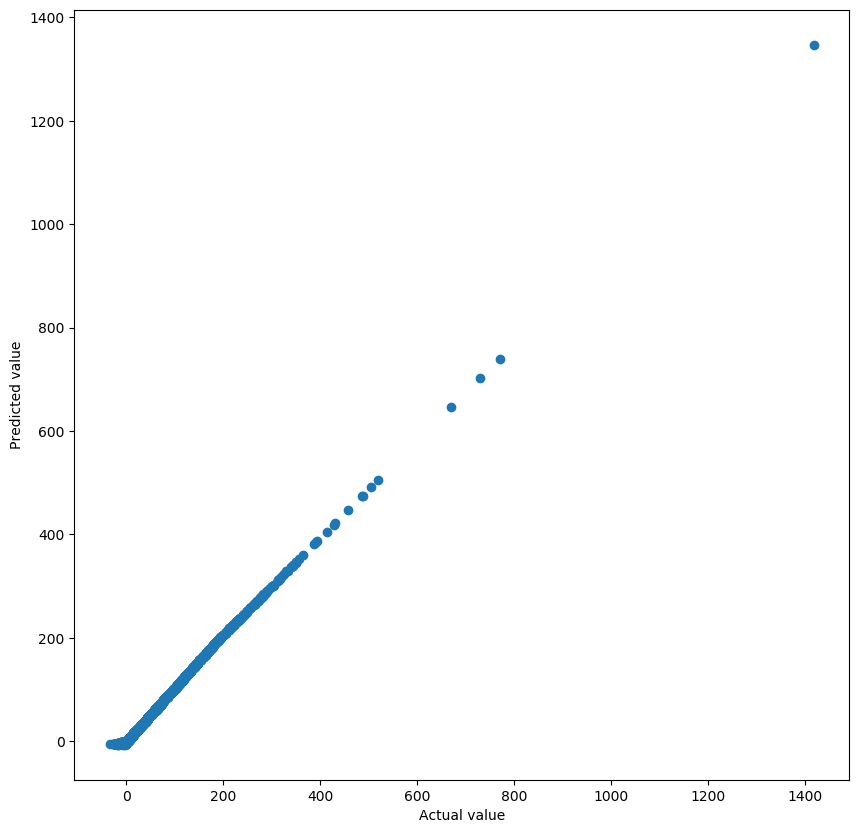

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_predict)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')


#### The following plot shows the absolute error of the model and its maximum error happens around 5 minutes. That means the model may not guess the departurre delay around 5 minutes properly.

Text(0.5, 1.0, 'Error of Boost Lasso')

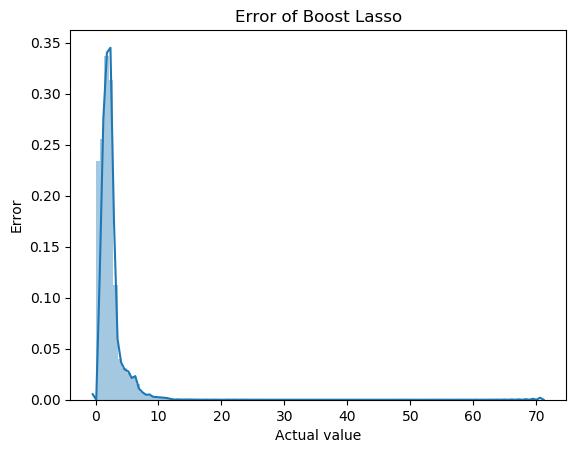

In [55]:
sns.distplot(abs(y_test-y_predict), bins=100)
plt.xlabel('Actual value')
plt.ylabel('Error')
plt.title('Error of Boost Lasso')

In [56]:
coeffecients = pd.DataFrame(linear.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
YEAR,-4.482708e-02
MONTH,2.829848e-02
DAY_OF_MONTH,1.517783e-02
DAY_OF_WEEK,-1.754784e-02
ORIGIN,-1.266759e-01
DEST,-3.521812e-02
CRS_DEP_TIME,-2.243852e-01
DEP_TIME,2.827069e-01
DEP_DELAY_NEW,3.059192e+01
DEP_DEL15,4.568647e-02


#### 1. The list of coefficients shows that 'DEP_DELAY_NEW' has the highest impact on the perdiction of departure delay.
#### 2. Cancelation reason has no effect on predicted departure delay. 
#### 3. The list shows that we can remove some data with low contribution from the dataframe df and have almost the same result. 

Lets test something: I want to drop some effective features like 'DEP_DELAY_NEW', 'DEP_DELAY_GROUP' from the model.

In [57]:
df_test = df

In [58]:
X = df_test.drop(['DEP_DELAY', 'ARR_DELAY', 'DEP_DELAY_NEW', 'DEP_DELAY_GROUP'], axis = 1)
y_departure = df_test['DEP_DELAY']
y_arrival= df_test['ARR_DELAY']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y_departure, test_size=0.20, random_state=30)

In [60]:
sc=preprocessing.StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [61]:
 model_departure = linear.fit(X_train_sc,y_train)
y_predict=model_departure.predict(X_test_sc)
accuracy= metrics.r2_score(y_test, y_predict)

In [62]:
accuracy

0.9535894562823481

In [63]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
# keep 50% of features with the best chi-squared scores
selection = SelectPercentile(chi2, percentile=50)
pipe = make_pipeline(selection, linear)
cross_val_score(pipe, X_train_sc, y_train, scoring='accuracy').mean()

C:\Users\Jahed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input X must be non-negative.

  FitFailedWarning)
C:\Users\Jahed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input X must be non-negative.

  FitFailedWarning)
C:\Users\Jahed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input X must be non-negative.

  FitFailedWarning)
C:\Users\Jahed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test part

nan

#### The above calculation shows that if we remove two imprortant feature 'DEP_DELAY_NEW' and 'DEP_DELAY_GROUP' from our model inputs, our model accuracy will be reduced 4 %.

In [64]:
coeffecients = pd.DataFrame(linear.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
YEAR,-6.339306e-02
MONTH,6.626833e-02
DAY_OF_MONTH,1.535685e-02
DAY_OF_WEEK,8.101657e-03
ORIGIN,-4.232364e-01
DEST,-2.482572e-01
CRS_DEP_TIME,-2.706233e+00
DEP_TIME,2.864133e+00
DEP_DEL15,6.317670e+00
TAXI_OUT,-3.913108e+00


## Train data and predict for arrival delays

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y_arrival, test_size=0.20, random_state=0)

In [66]:
sc=preprocessing.StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [67]:
accuracy = []
for model, name in zip([lasso,linear,ridge, boost_lasso, boost_linear, boost_ridge, bag_lasso, bag_linear, bag_ridge], 
                       ['Lasso','Linear','Ridge', 'Boost Lasso', 'Boost Linear', 'Boost Ridge', 'Bag Lasso', 'Bag Linear', 'Bag Ridge']):
    model_departure = model.fit(X_train_sc,y_train)
    y_predict=model_departure.predict(X_test_sc)
    accuracy.append(metrics.r2_score(y_test, y_predict))

In [68]:
models = pd.DataFrame({
    'Model': ['Lasso','Linear','Ridge', 'Boost Lasso', 'Boost Linear', 'Boost Ridge', 'Bag Lasso', 'Bag Linear', 'Bag Ridge'],
    'R2-Score': [i for i in accuracy]})
models.sort_values(by='R2-Score', ascending=False, ignore_index=True)

,Model,R2-Score
0,Bag Ridge,0.970745
1,Bag Linear,0.970745
2,Ridge,0.970625
3,Linear,0.970624
4,Bag Lasso,0.969057
5,Lasso,0.969035
6,Boost Ridge,0.964526
7,Boost Linear,0.964068
8,Boost Lasso,0.963633


Text(0, 0.5, 'Predicted value')

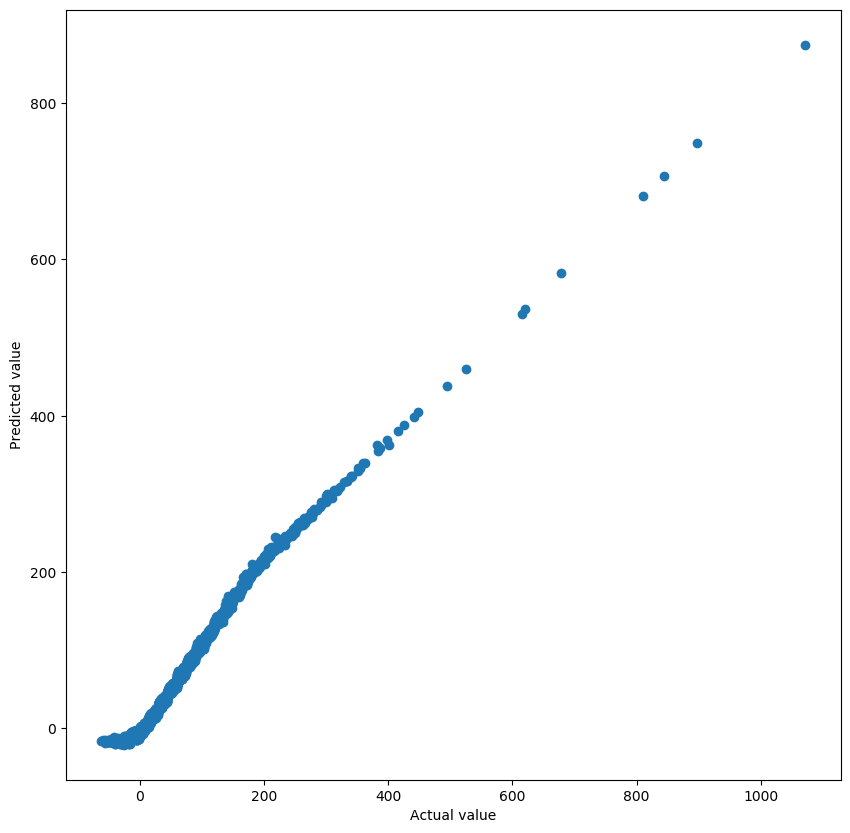

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_predict)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

#### The following plot shows the absolute error of the model and says its maximum error happens between 1 and 5 minutes. That means the model may not guess the arrival delay around 5 minutes properly.

Text(0.5, 1.0, 'Error of Boost Lasso')

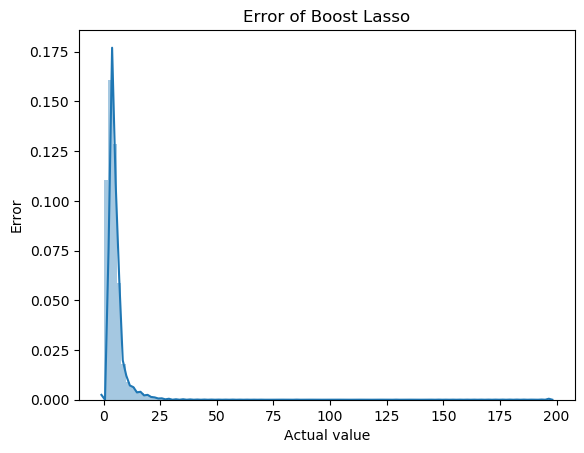

In [70]:
sns.distplot(abs(y_test-y_predict), bins=100)
plt.xlabel('Actual value')
plt.ylabel('Error')
plt.title('Error of Boost Lasso')

In [71]:
coeffecients = pd.DataFrame(linear.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
YEAR,0.011434
MONTH,0.130310
DAY_OF_MONTH,0.033039
DAY_OF_WEEK,-0.088169
ORIGIN,0.110540
DEST,0.022718
CRS_DEP_TIME,1.311443
DEP_TIME,-1.129281
DEP_DEL15,0.569289
TAXI_OUT,0.668429


#### 1. The list of coefficients shows that 'DEP_DELAY_NEW', 'DEP_DELAY_GROUP' and 'ARR_DELAY_NEW' has the highest impact on the perdiction of arrival delay.
#### 2. Cancelation reason has once again no effect on predicted arrival delay and can be removed from dataframe. 

# Conclusions

<h3>
<ul>
<li> Random Forest shows to be the best model for both departure and arrival delay prediction.</li>
</br>    
<li>As accuracy of linear models are similar for the case of departure delay, we can choose the less complex models (Ridge or Linear).</li>
</br>  
<li>If we remove some of (not all of) most contributed features from our model, our model accuracy will be reduced but we still may get some good accuracy.</li>
</br> 
<li>Arrival delays are more avoidable/modifyable when there is a departure delay at the origin. This is normally done by speedup the airplane by pilot.</li>
</ul>
    </h3>